In [28]:
# importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# loading the data and looking at the overview
df=pd.read_excel("deliveries_updated_mens_ipl_upto_2024.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   matchId           260920 non-null  int64         
 1   inning            260920 non-null  int64         
 2   over_ball         260920 non-null  float64       
 3   over              260920 non-null  int64         
 4   ball              260920 non-null  int64         
 5   batting_team      260920 non-null  object        
 6   bowling_team      260920 non-null  object        
 7   batsman           260920 non-null  object        
 8   non_striker       260920 non-null  object        
 9   bowler            260920 non-null  object        
 10  batsman_runs      260920 non-null  int64         
 11  extras            260920 non-null  int64         
 12  isWide            8381 non-null    float64       
 13  isNoBall          1093 non-null    float64       
 14  Byes

In [30]:
df.describe()

,matchId,inning,over_ball,over,ball,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,date
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,8381.000000,1093.000000,673.000000,4001.000000,2.0,260920
mean,9.070665e+05,1.483531,9.560015,9.197677,3.623452,1.265001,0.067806,1.201050,1.032022,1.866270,1.307673,5.0,2016-07-08 06:32:41.649547776
min,3.359820e+05,1.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2008-04-18 00:00:00
25%,5.483340e+05,1.000000,4.500000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2012-04-22 00:00:00
50%,9.809670e+05,1.000000,9.400000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2016-05-06 00:00:00
75%,1.254066e+06,2.000000,14.400000,14.000000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,2021-04-17 00:00:00
max,1.426312e+06,6.000000,19.900000,19.000000,11.000000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,2024-05-26 00:00:00
std,3.679913e+05,0.502643,5.686116,5.683484,1.813850,1.639298,0.343265,0.783803,0.314310,1.312692,0.852387,0.0,NaN


In [31]:
# dropping duplicate rows 
df.drop_duplicates(inplace=True)

In [32]:
# checking number of null values 
df.isnull().sum()

matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252536
isNoBall            259824
Byes                260244
LegByes             256916
Penalty             260915
dismissal_kind      247967
player_dismissed    247967
date                     0
dtype: int64

In [33]:
#finds the Maximum run scoring Batsman
top_scorers=df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [34]:
print(top_scorers)

batsman
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


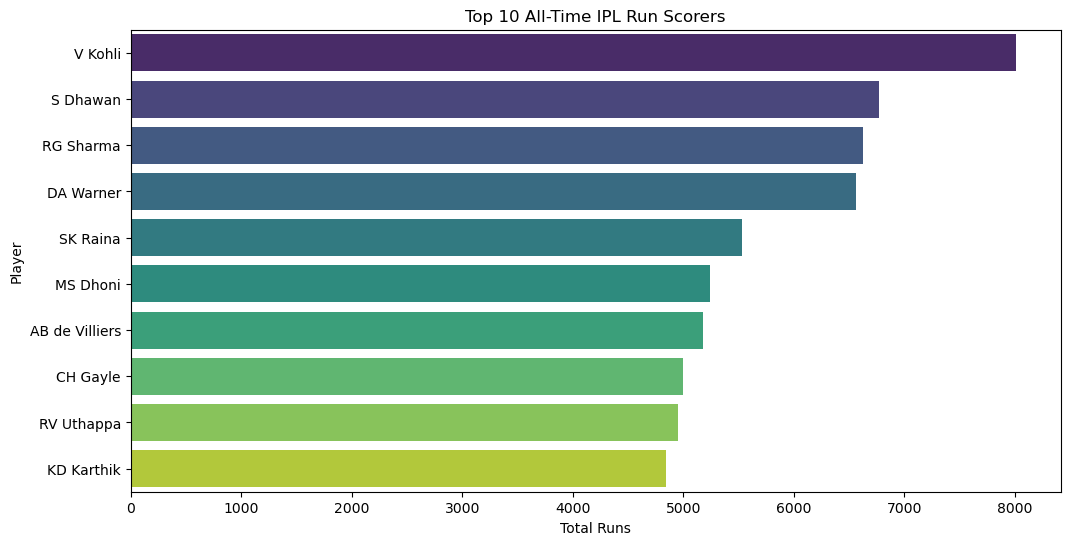

In [45]:
# plotting the batman vs runs scored 
plt.figure(figsize=(12,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, hue=top_scorers.index, palette='viridis', legend=False)
plt.title('Top 10 All-Time IPL Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

In [36]:
# Finding the bowler who has bowled the most number of wide balls 
most_wide_bowled_by=df.groupby('bowler')['isWide'].sum().sort_values(ascending=False).head(10)

In [37]:
print(most_wide_bowled_by)

bowler
R Ashwin          187.0
DJ Bravo          173.0
B Kumar           173.0
SL Malinga        152.0
P Kumar           144.0
Mohammed Siraj    138.0
HV Patel          129.0
I Sharma          129.0
Mohammed Shami    126.0
UT Yadav          122.0
Name: isWide, dtype: float64


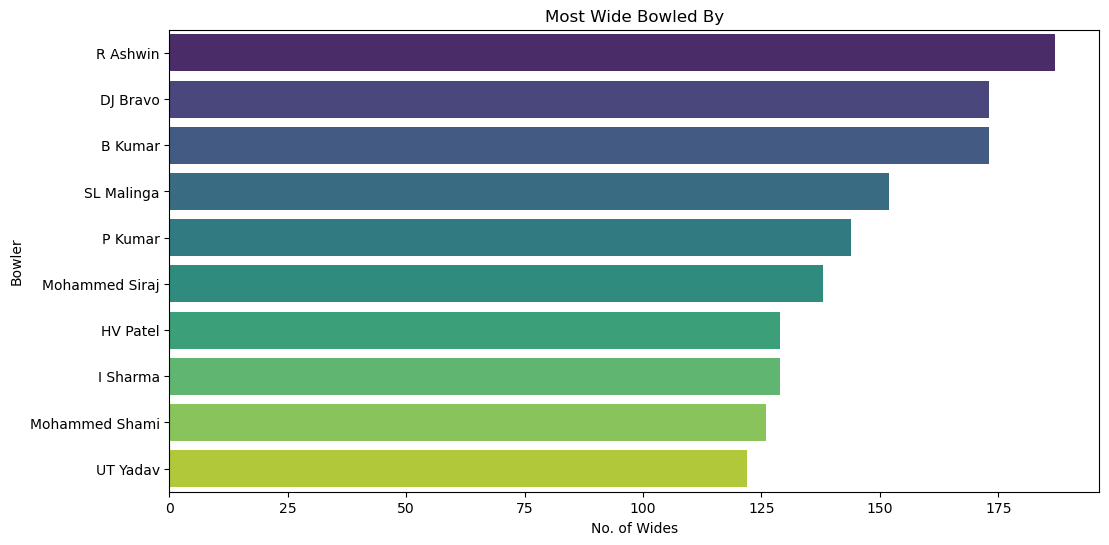

In [47]:
#plotting bowler vs wide ball 
plt.figure(figsize=(12,6))
sns.barplot(x=most_wide_bowled_by.values, y=most_wide_bowled_by.index, hue=most_wide_bowled_by.index, palette='viridis', legend=False)
plt.title('Most Wide Bowled By')
plt.xlabel('No. of Wides')
plt.ylabel('Bowler')
plt.show()

In [44]:
# finding the combination where the bowler was effective at dismissing the batsman

bowler_credited_dismissals=['caught','bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
]
dismissals_df=df[df['dismissal_kind'].isin(bowler_credited_dismissals)]
dismissals_df['bowler_batsman']=dismissals_df['bowler']+ ' vs '+ dismissals_df['player_dismissed']
top_combinations = dismissals_df['bowler_batsman'].value_counts().head(10)
print(top_combinations)


bowler_batsman
SP Narine vs RG Sharma        8
B Kumar vs AM Rahane          7
A Mishra vs RG Sharma         7
MM Sharma vs AT Rayudu        7
R Ashwin vs RV Uthappa        7
Z Khan vs MS Dhoni            7
JJ Bumrah vs RR Pant          7
Sandeep Sharma vs V Kohli     7
DL Chahar vs PP Shaw          6
R Vinay Kumar vs RG Sharma    6
Name: count, dtype: int64


C:\Users\yashd\AppData\Local\Temp\ipykernel_23144\1508967455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissals_df['bowler_batsman']=dismissals_df['bowler']+ ' vs '+ dismissals_df['player_dismissed']


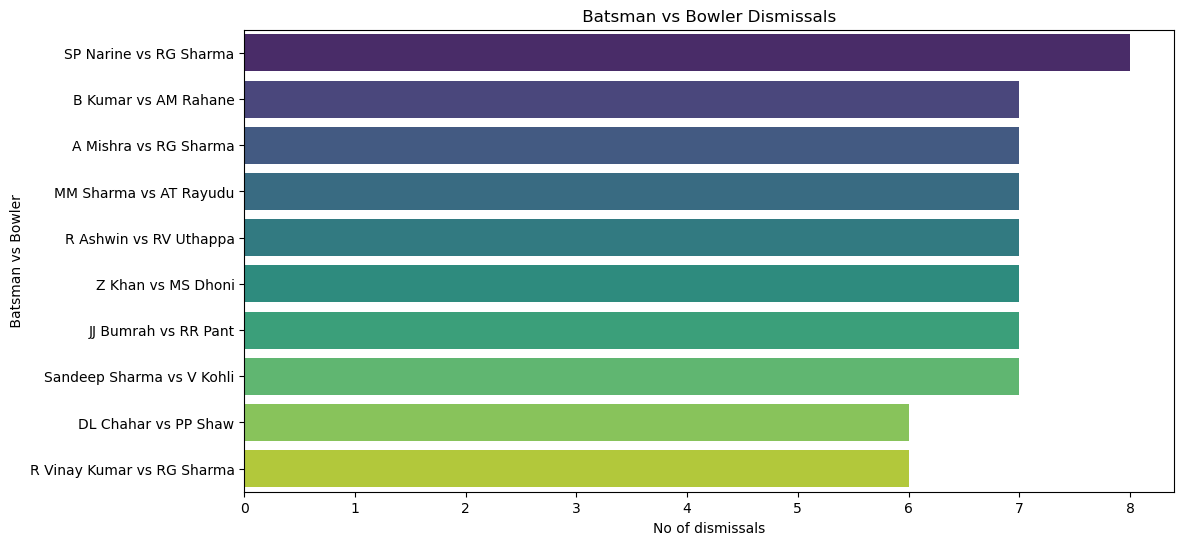

In [48]:
# plottng the data
plt.figure(figsize=(12,6))
sns.barplot(x=top_combinations.values, y=top_combinations.index, hue=top_combinations.index, palette='viridis', legend=False)
plt.title(' Batsman vs Bowler Dismissals ')
plt.ylabel(' Batsman vs Bowler ')
plt.xlabel('No of dismissals')
plt.show()